# polynomial Linear Regression

![title](polynomial.png)

when the data is in power,we are using one variable but different power

the power gives the data parabolic effect,  


why?is it called  linear,
ans:when we ever we are talking about linear and non linear,then we are talking about with respect to the co-effient and intercpt
but not the variables,

https://www.youtube.com/watch?v=5LiDSi8oW3o
 



# linear Quadratic and cubic
![title](linear_cubic_quadratic.jpg)

polynomail linear,confusion
This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

# The Bias vs Variance trade-off
1)Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.
2)Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.

a machine learning model should have low variance and low bias.

![tradeoff](tradeoff.png)

# polynomial interpolation
In numerical analysis, polynomial interpolation is the interpolation of a given data set by the polynomial of lowest possible degree that passes through the points of the dataset.

https://towardsdatascience.com/baby-steps-towards-data-science-polynomial-regression-in-python-a75f371bd984

https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
    

In [8]:
import numpy as np
import cv2 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
dataset=pd.read_csv("./Position_Salaries.csv")
dataset
# check the data it has no linearity 
salary=dataset.iloc[:,2].values

In [10]:
# sns.heatmap(dataset.corr(), annot=True)

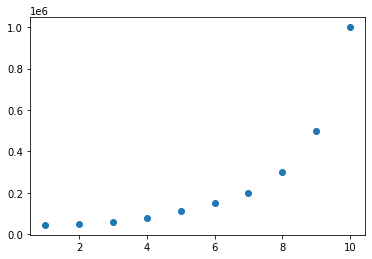

In [15]:
# the data is non linear data
plt.scatter(dataset.iloc[:,1].values,dataset.iloc[:,2].values)
plt.show()

In [17]:
features=dataset.iloc[:,1].values
label=dataset.iloc[:,2].values

In [21]:
# as you can see the features are in form o vector,but model need it in form of matrix,so let do it
features=dataset.iloc[:,1:2].values


In [22]:
# since the data is very small so we cant split the data

In [23]:
# let build two model for comparsion 
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(features,label)

LinearRegression()

In [26]:
lin_model.score(features,label)
# ohhh no 66 per accuracy very bad,it is because the data is no linear


0.6690412331929895

# how polynomial works
it is a class which includes some polynomial terms into the linear regression equation

how to select that which power should be use,
so formula is 
BIC=n log(SSe)+klog(n)
same of square of the resudial(sse)
base information cateria

In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly_model=PolynomialFeatures(degree=2)

poly_features=poly_model.fit_transform(features)
# poly_features

In [84]:
# print(pd.DataFrame(poly_features))
# poly_features.shape

#         so we got a martix of no linear variables now go with these
model_2=LinearRegression()
model_2.fit(poly_features,label)


LinearRegression()

In [85]:
model_2.score(poly_features,label)
# ohhh no 91 percent,thats good,


0.9162082221443942

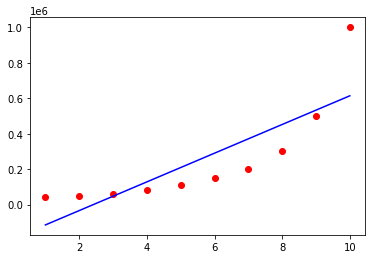

In [86]:
                             # let visualize that have we done 
plt.scatter(features,label,color="red")
plt.plot(features,lin_model.predict(features),color='blue')
plt.show()
# too bad,

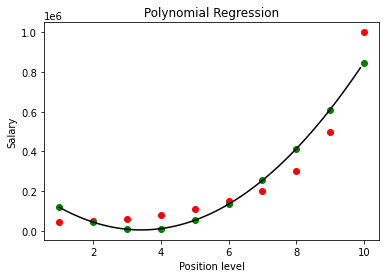

In [113]:
X_grid = np.arange(min(features), max(features), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(features, label, color = 'red')
plt.scatter(features, model_2.predict(poly_features), color = 'green')
plt.plot(X_grid, model_2.predict(poly_model.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


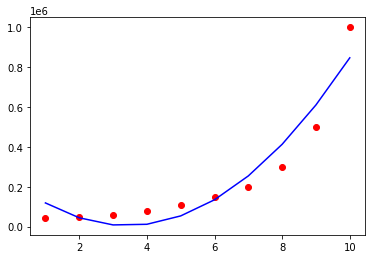

In [119]:

plt.scatter(features,label,color="red")
plt.plot(features,model_2.predict(poly_model.fit_transform(features)),color="blue")
plt.show()


In [90]:
# now try with degree 3 or degree 4

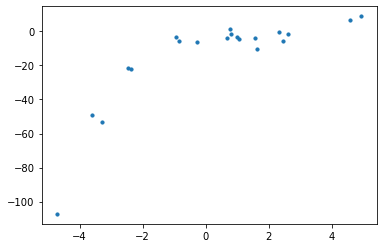

In [91]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

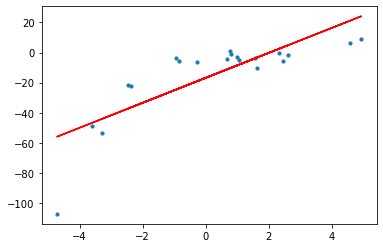

In [92]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_pred))
  # rmse=>square mean root error
r2 = r2_score(y,y_pred)
# r2 confidence

10.120437473614711
0.8537647164420812


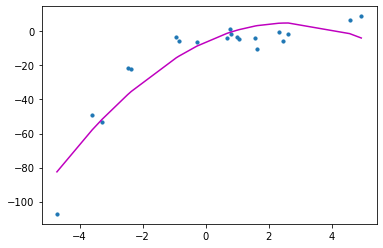

In [103]:
from sklearn.preprocessing import PolynomialFeatures
import operator
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [105]:
X_grid = np.arange(min(features), max(features), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))


In [107]:
X_grid.shape

(90, 1)

In [123]:
from sklearn.preprocessing import MinMaxScaler
model=MinMaxScaler()
salary=np.array(salary)
salary=salary.reshape(len(salary),1)
salary=model.fit_transform(salary)

array([[0.        ],
       [0.0052356 ],
       [0.01570681],
       [0.03664921],
       [0.06806283],
       [0.10994764],
       [0.16230366],
       [0.26701571],
       [0.47643979],
       [1.        ]])